# MTH9879 Homework 9
#### Name: ShengQuan Zhou

Assigned: April 25, 2017.
Due: May 9, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


### 1. (20 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Does the optimal strategy depend on the stock price $S_t$?  Why not?  Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


#### Solution (a):
$$
\int_0^T S_t dx_t = S_t x_t\big|_0^T - \int_0^T x_t dS_t
= -S_0 X -\sigma \int_0^T x_t dZ_t
$$
Thus,
\begin{align}
\mathcal{C} &= \mathbb{E}[C]\\
&=\mathbb{E}\left[ \int_0^T (S_t -\eta v_t)dx_t +\lambda\sigma\int_0^T x_t dt \right]\\
&= \mathbb{E}\left[ -S_0 X -\sigma \int_0^T x_t dZ_t -\int_0^T \eta v_t dx_t +\lambda\sigma\int_0^T x_t dt \right]\\
&= \mathbb{E}\left[ -S_0 X -\underbrace{\sigma \int_0^T x_t dZ_t} _ {\text{Martingality}} + \eta\int_0^T  v_t^2 dt +\lambda\sigma\int_0^T x_t dt \right]\\
&= -S_0 X + \eta\int_0^T  v_t^2 dt +\lambda\sigma\int_0^T x_t dt.
\end{align}
The value function
$$
\mathcal{C}(t,x) = \inf_{v\in\mathcal{G}[t,T]}
\mathbb{E}\left[ \int_t^T (S_u -\eta v_u)dx_u +\lambda\sigma
\int_t^T x_u du\middle| X_t = x\right]
$$
satisfies the Kratz-Schöneborn HJB equation
$$
\mathcal{C}_t + \min_{v}\left\{ -v \mathcal{C}_x +\eta v^2 +\lambda \sigma x \right\} = 0,
$$
or
$$
\mathcal{C}_t +\lambda \sigma x + \min_{v}\left\{ -v \mathcal{C}_x +\eta v^2  \right\} = 0.
$$

#### Solution (b):

First order condition:
$$
\frac{\partial}{\partial v}\left( -v \mathcal{C}_x +\eta v^2  \right) = -\mathcal{C}_x + 2\eta v = 0\Rightarrow v^\star = \frac{\mathcal{C}_x}{2\eta}.
$$

#### Solution (c):

Substitute back to HJB:
$$
\mathcal{C}_t + \lambda\sigma x + \left( -\frac{\mathcal{C}_x^2}{2\eta} + \frac{\mathcal{C}_x^2}{4\eta} \right) = 0 \Rightarrow \mathcal{C}_t  + \lambda\sigma x - \frac{\mathcal{C}_x^2}{4\eta} = 0.
$$

#### Solution (d):

Ansatz: $\mathcal{C}(t,x) = \eta[a(t)x^2 + b(t)x+c(t)]$. According to HJB:
$$
\eta[\dot{a}x^2 + \dot{b}x + \dot{c}] + \lambda \sigma x - \frac{\eta}{4}[2ax+b]^2 = 0,
$$
or
$$
\dot{a}x^2 + \dot{b}x + \dot{c} + \frac{\lambda\sigma}{\eta}x - a^2x^2 - \frac{b^2}{4} - abx = 0.
$$
Matching the coefficients of the polynomial of $x$:
$$
\begin{cases}
\dot{a}-a^2 = 0,\\
\dot{b}-ab+\frac{\lambda\sigma}{\eta} = 0,\\
\dot{c}-\frac{b^2}{4} = 0.
\end{cases}
$$
From the first equation above, we can solve
$$
a(t) = \frac{1}{T-t}.
$$
The above form of $a(t)$ is consistent with the condition
$$
\lim_{t\uparrow T}\mathcal{C}(t,x)=\infty.
$$
Thus, for $b(t)$,
$$
\dot{b}-\frac{b}{T-t}+\frac{\lambda\sigma}{\eta} = 0
\Rightarrow b(t) = \frac{\lambda\sigma}{2\eta}(T-t) + \frac{C_1}{T-t},
$$
where $C_1$ is a constant. Thus, for $c(t)$,
$$
\dot{c}=\frac{1}{4}\left[\frac{\lambda\sigma}{2\eta}(T-t) + \frac{C_1}{T-t}\right]^2\\
\Rightarrow
c(t)=\frac{1}{4}\left[-\frac{\lambda^2\sigma^2}{12\eta^2}(T-t)^3+\frac{C_1^2}{T-t}+\frac{\lambda\sigma C_2}{\eta}T\right]+C_2,
$$
where $C_2$ is a constant.

Given the condition when $x = 0$, i.e. $\mathcal{C}(t)=\eta c(t)$
$$
\lim_{t\uparrow T}\mathcal{C}(t,x=0)=0 \Rightarrow c(T) = 0 \Rightarrow C_1 = C_2 = 0.
$$
Thus, in summary
\begin{align}
a(t) &= \frac{1}{T-t},\\
b(t) &= \frac{\lambda\sigma}{2\eta}(T-t),\\
c(t) &= -\frac{\lambda^2\sigma^2}{48\eta^2}(T-t)^3.
\end{align}
Thus,
$$
\mathcal{C}_x = \eta[2ax+b] = \eta\left[ \frac{2x}{T-t}  + \frac{\lambda\sigma}{2\eta}(T-t)\right].
$$
The optimal trading rate
$$
v^{\star} = \frac{\mathcal{C}_x}{2\eta} = \frac{x}{T-t}  + \frac{\lambda\sigma}{4\eta}(T-t)
= \frac{x}{T-t}  + \frac{\kappa}{4}(T-t),
$$
where $\kappa\triangleq \frac{\lambda\sigma}{\eta}$.


#### Solution (e):

In optimal trading strategy:
$$
\dot{x} = -v^{\star} = -\frac{x}{T-t} - \frac{\kappa}{4}(T-t),
$$
with initial condition $x_0 = X$. Integrate the above ODE gives
$$
x_t = \left( \frac{X}{T} - \frac{\kappa t}{4} \right)(T-t)
= \kappa \left( \frac{X}{\kappa} - \frac{Tt}{4} \right)\left(1 -\frac{t}{T}\right).
$$
Define
$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$
we can write
$$
x_t = X \left( 1-\frac{Tt}{(T^\star)^2} \right)\left(1 -\frac{t}{T}\right).
$$
With the liquidation horizon set to $T^\star = T$, we obtain
$$
x_t = X \left(1 -\frac{t}{T}\right)^2.
$$

## ABM and GBM

### Download MSFT data

In [55]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

In [56]:
library(repr)
options(repr.plot.height=5)

### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The *msft.bats* dataset from *MSFT130311.rData* contains all trades on the BATS exchange on 11-Mar-2013.  One trading days has 390 minutes.  Sample the  *msft.bats* dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



#### Solution (a):

In [57]:
ls()

[1] "deviations"      "df"              "i"               "j"              
 [5] "ls_index"        "ls_samples"      "maxDeviation"    "msft130311.bats"
 [9] "msft130311.both" "msft130311.inet" "numTrades"       "price"          
[13] "rABM"            "rGBM"            "t"               "T"              
[17] "totalVol"        "ts"              "vABM"            "vGBM"           
[21] "volumeTime"      "volumeTimeIndex" "xABM"            "xGBM"

In [58]:
df <- msft130311.bats
data.frame(head(msft130311.bats))

signed.shares,trade.price
35,27.95
100,27.90
900,27.91
400,27.94
100,27.94
100,27.94


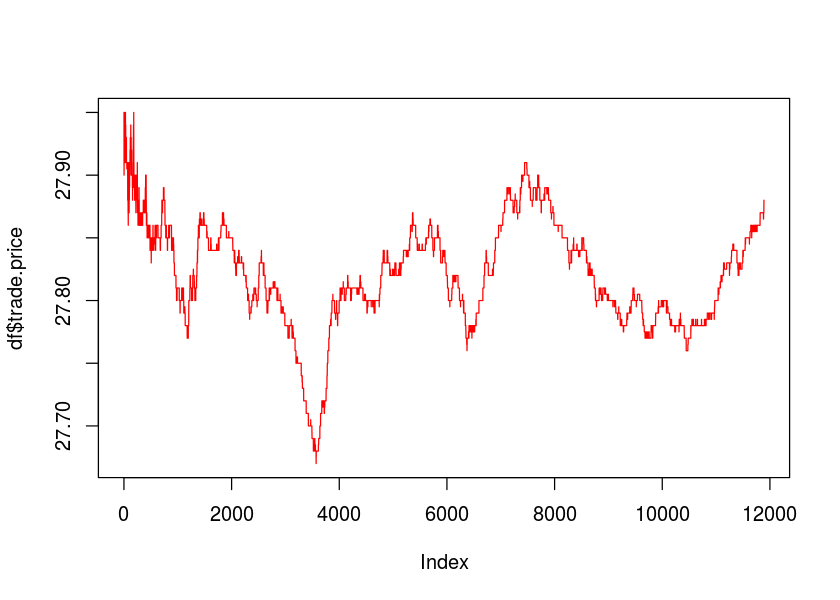

In [59]:
plot(df$trade.price, type='l', col='red')

In [60]:
# Number of minutes per trading day
T <- 390 
# Time axis
ts <- c(1:T) 
# Cumulative volume
df$cumVolume <- cumsum(abs(df$signed.shares))
# Number of trades
numTrades <- length(df$cumVolume)
# Total volume of trades
totalVol <- df$cumVolume[numTrades]

# Equal spacing in volume time
volumeTime <- seq(1, totalVol, totalVol/T)

In [61]:
# Index of volume time steps
volumeTimeIndex <- c(1:length(volumeTime))
j = 1
for (i in 1:numTrades) 
{
    if (df$cumVolume[i] > volumeTime[j] && j <=390) 
    {
        volumeTimeIndex[j] = i
        j = j+1
    }
}

In [62]:
# Stock prices in equal-spaced volume time
price <- df[volumeTimeIndex, 'trade.price']

In [63]:
# ABM
xABM <- c(1:T+1)
vABM <- c(1:T)
xABM[1] = totalVol

# GBM
xGBM <- c(1:T+1) 
vGBM <- c(1:T) 
xGBM[1] = totalVol

# Optimal trading rates
for (t in 1:T)
{
    vABM[t] = abs(xABM[t])/(T + 1 - t) + totalVol / T * (1 - (t - 1)/T) 
    xABM[t+1] = max(xABM[t] - vABM[t], 0)
    
    vGBM[t] = abs(xGBM[t])/(T + 1 - t) + totalVol / T * price[t]/price[1] * (1 - (t - 1)/T)
    xGBM[t+1] = max(xGBM[t] - vGBM[t], 0)
}

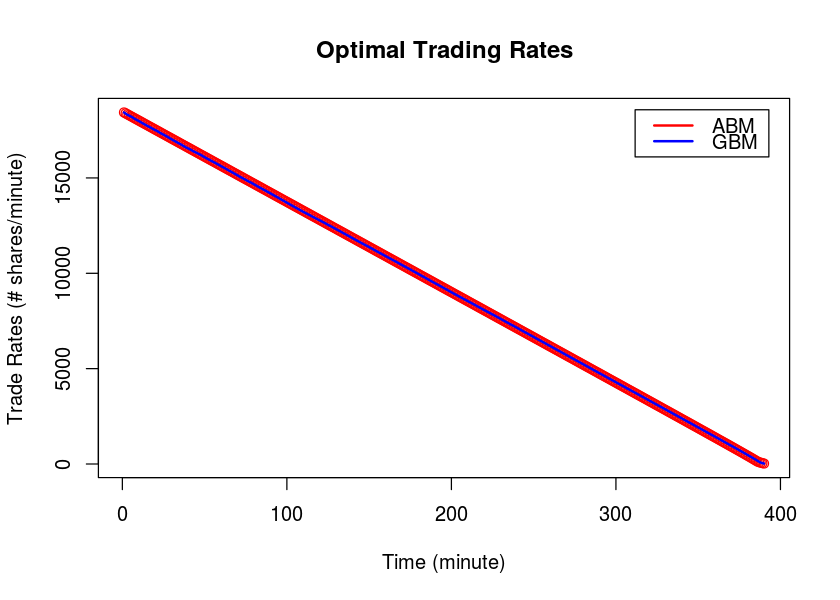

In [64]:
# Plot the optimal trading rates vs time
plot(ts, vABM, xlab = "Time (minute)", ylab = "Trade Rates (# shares/minute)", col = "red", main = 'Optimal Trading Rates')
lines(ts, vGBM, col = "blue", type = "l", lwd = 2)
legend("topright", c("ABM","GBM"), col = c("red","blue"), lwd = 2, inset = 0.03)

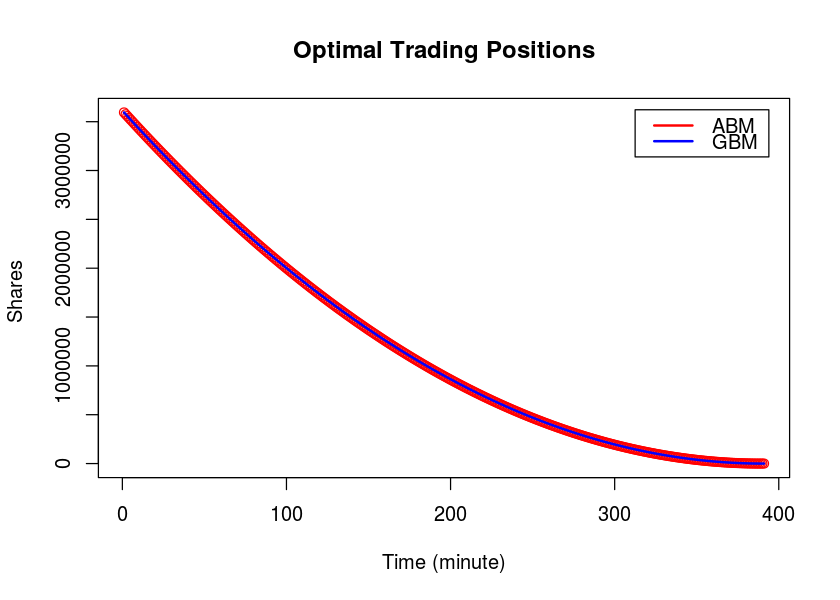

In [65]:
# Plot the optimal trading positions vs time
plot(c(ts, length(ts)+1), xABM, xlab = "Time (minute)", ylab = "Shares ", col = "red", main = 'Optimal Trading Positions')
lines(c(ts, length(ts)+1), xGBM, col = "blue", type = "l", lwd = 2)
legend("topright", c("ABM","GBM"), col = c("red","blue"), lwd = 2, inset = 0.03)

#### Solution (b):

In [66]:
deviations <- sapply(ts, function(t)(xGBM[t] - xABM[t])/totalVol*100.)
maxDeviation <- max(deviations)
t.test(deviations)
cat("Maximum Deviation between ABM and GBM is:", maxDeviation, "%.")


	One Sample t-test

data:  deviations
t = 38.993, df = 389, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.07339045 0.08118435
sample estimates:
mean of x 
0.0772874 


Maximum Deviation between ABM and GBM is: 0.1235201 %.

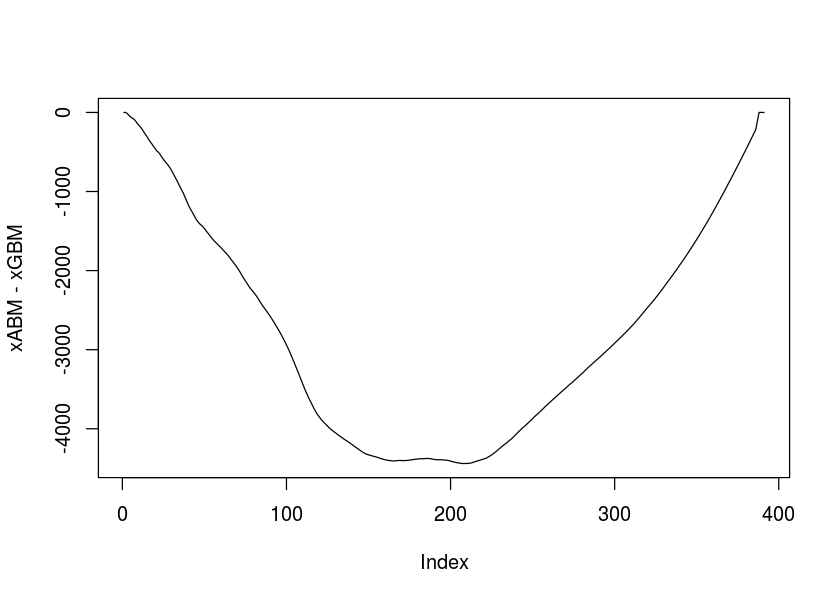

In [67]:
plot(xABM - xGBM, col='black', type='l')

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.


#### Solution (a):

HJB equation:
$$
\mathcal{C}_t + \lambda\sigma x_t +\min_{v,y\in \mathcal{G}}
\left\{-v\mathcal{C}_x +\eta v^2 +\theta[\mathcal{C}(x_t - y)- \mathcal{C}(x_t)]\right\} = 0.
$$
To minimize $[\mathcal{C}(x_t - y)- \mathcal{C}(x_t)]$ with repsect to $y$, we set $y^\star = x_t$.

We adopt the approach of Euler-Lagrange equation. Since $y^\star = x_t$, we have
$$
dx_t = -v_t dt -x_t d\pi_t.
$$
Define a stopping time
$$
\tau \triangleq \inf\{t|t>0, \pi_t = 1\},
$$
where $\pi_t$ obeys a Poisson distribution with intensity $\theta$. Thus,
$$
x_t = \begin{cases}
-\int_0^t v_s ds, \, &t\in[0,\tau),\\
0, & t\in[\tau,T]
\end{cases}
$$
The distribution of $\pi_t$ is
$$
\mathbb{P}(\pi_t = k) = e^{-\theta t}\frac{(\theta t)^k}{k!}
$$
and
$$
\mathbb{P}(\tau>t) = \mathbb{E}[\mathbb{1}_{t<\tau}] =\mathbb{P}[\pi_t = 0] = e^{-\theta t}.
$$

In the current problem
\begin{align}
\mathcal{C} &= \eta\mathbb{E}\left[\int_0^T \left( \dot{x} _ t^2 +\frac{\lambda\sigma}{\eta}x_t \right)\mathbb{1} _ {t<\tau}dt\right]\\
&= \eta\int_0^T \left( \dot{x} _ t^2 +\frac{\lambda\sigma}{\eta}x_t \right)\mathbb{E}\left[\mathbb{1} _ {t<\tau}\right]dt\\
&= \eta\int_0^T \left( \dot{x} _ t^2 +\frac{\lambda\sigma}{\eta}x_t \right)e^{-\theta t}dt.
\end{align}
Define $L(t,x,\dot{x}) = \left( \dot{x} _ t^2 +\frac{\lambda\sigma}{\eta}x_t \right)e^{-\theta t}$ and solve Euler-Lagrange equation
$$
\frac{\partial}{\partial t}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial x} = 0,
$$
where
$$\frac{\partial L}{\partial {x}}=\frac{\lambda\sigma}{\eta}e^{-\theta t},\,\,\,\frac{\partial L}{\partial {\dot x} }=2\dot{x}_te^{-\theta t}.$$
Thus,
$$
\ddot{x}_t -\theta \dot{x}_t -\frac{\lambda\sigma}{2\eta}=0.
$$
Integrating the above 2nd order linear ODE, we obtain
$$
x_t = \frac{C_1}{\theta}e^{\theta t} -\frac{A}{\theta}t + C_2,
$$
where $C_1,C_2$ are constants, $A=\frac{\lambda\sigma}{2\eta}$.

Given the boundary conditions as $X_0 = X$, $X_{\tau \wedge T} = 0$, we have

   $$\left \{ \begin{array}{rcl}
C_1&=&\frac{A(\tau \wedge T)-\theta X}{e^{\theta (\tau \wedge T)}-1} \\
C_2&=&X-\frac{A (\tau \wedge T)-\theta X}{\theta \left[e^{\theta (\tau \wedge T)}-1\right]}\\
\end{array}\right.    
$$
Thus,
\begin{align}
x^\star(t)&=\left[X-\frac{A (\tau \wedge T)}{\theta }\right]\,\frac{1-e^{-\theta\,\left[(\tau \wedge T)-t\right]} }{1-e^{-\theta\,(\tau \wedge T) }}+\frac{A }{\theta }\,\left[(\tau \wedge T)-t\right]\\
&=\begin{cases}
\left[X-\frac{A (\tau \wedge T)}{\theta }\right]\,\frac{1-e^{-\theta\,\left[(\tau \wedge T)-t\right]} }{1-e^{-\theta\,(\tau \wedge T) }}+\frac{A }{\theta }\,\left[(\tau \wedge T)-t\right],  & t\in [0,\tau \wedge T) \\
0, & \text{otherwise.} \\
\end{cases}
\end{align}
The optimal trading rate is
$$v^\star(t)=-\dot x^\star(t) = \begin{cases}
\theta\left[X-\frac{A(\tau \wedge T)}{\theta}\right]\frac{e^{-\theta\left[(\tau \wedge T)-t\right]}}{1-e^{-\theta (\tau \wedge T)}} + \frac{A}{\theta},  & t\in [0,\tau \wedge T) \\
+\infty, &t=\tau\,\text{ and }\,\tau \leq T \\
0,  & \text{otherwise}. \\
\end{cases}
$$
In the special case when $\tau \wedge T=T$:

\begin{align}
x^\star(t)&=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t) \\
v^\star(t)&= \theta\left(X-\frac{AT}{\theta}\right)\frac{e^{-\theta(T-t)}}{1-e^{-\theta T}} + \frac{A}{\theta}\\
\end{align}

#### Solution (b):

Consider the case $\tau \wedge T=T$:
$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t).
$$
Expand around $\theta = 0$,
\begin{align}
\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}
&\approx \frac{(T-t)\theta -\frac{1}{2}\theta^2(T-t)^2}{
T\theta -\frac{1}{2}\theta^2T^2}\\
&\approx \frac{(T-t)-\frac{1}{2}\theta(T-t)^2}{
T -\frac{1}{2}\theta T^2}\\
&\approx \frac{T-t}{T}\left[1-\frac{1}{2}\theta(T-t)\right]\left[1-\frac{1}{2}\theta T\right]^{-1}\\
&\approx \frac{T-t}{T}\left[1-\frac{1}{2}\theta(T-t)\right]\left[1+\frac{1}{2}\theta T\right]\\
&\approx \frac{T-t}{T}\left[1-\frac{1}{2}\theta(T-t)+\frac{1}{2}\theta T\right]\\
&= \frac{T-t}{T}\left(1+\frac{1}{2}\theta t\right) + O(\theta^2).
\end{align}
Thus, in the limit $\theta\rightarrow0$,
\begin{align}
x^\star(t)&= \left(X-\frac{A\, T}{\theta }\right)
\frac{T-t}{T}\left(1+\frac{1}{2}\theta t\right)
+\frac{A }{\theta }\,(T-t)\\
&= \left(X-\frac{A \, T}{2}\,t\right)\left(1-\frac{t}{T}\right).
\end{align}